In [ ]:
# STT: 31
# Họ và tên: Lê Hoàng Huy
# Lớp: IE224.O11.CNCL
# LAB 2

***Câu 1: Kiểm tra kiểu dữ liệu của các biến trong bộ dữ liệu có phù hợp không. Bộ dữ liệu có bị khuyết giá trị nào không?***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/EDA_Model_automobile_V2.csv')

In [29]:
data

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,1,154,plymouth,std,four,sedan,fwd,front,93.7,0.803940,...,9.4,68.0,5500.0,31,38,7609,7.580645,Low,0,1
1,0,122,peugot,turbo,four,wagon,rwd,front,114.2,0.955790,...,21.0,95.0,4150.0,25,25,13860,9.400000,Low,1,0
2,0,102,subaru,turbo,four,sedan,4wd,front,97.0,0.826526,...,7.7,111.0,4800.0,24,29,11259,9.791667,Medium,0,1
3,0,145,jaguar,std,four,sedan,rwd,front,113.0,0.959154,...,8.1,176.0,4750.0,15,19,32250,15.666667,High,0,1
4,-1,93,mercedes-benz,turbo,four,sedan,rwd,front,115.6,0.973570,...,21.5,123.0,4350.0,22,25,31600,10.681818,Medium,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-2,103,volvo,std,four,sedan,rwd,front,104.3,0.907256,...,9.5,114.0,5400.0,24,28,15985,9.791667,Medium,0,1
196,0,122,peugot,std,four,wagon,rwd,front,114.2,0.955790,...,8.4,95.0,5000.0,19,24,16695,12.368421,Low,0,1
197,3,194,nissan,turbo,two,hatchback,rwd,front,91.3,0.820279,...,7.8,200.0,5200.0,17,23,19699,13.823529,High,0,1
198,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045,12.368421,High,0,1


In [6]:
data.tail(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
190,1,103,nissan,std,four,wagon,fwd,front,94.5,0.817876,...,9.4,69.0,5200.0,31,37,7999,7.580645,Low,0,1
191,1,101,honda,std,two,hatchback,fwd,front,93.7,0.720807,...,9.2,76.0,6000.0,30,34,7129,7.833333,Low,0,1
192,1,148,dodge,std,four,sedan,fwd,front,93.7,0.755887,...,9.4,68.0,5500.0,31,38,7609,7.580645,Low,0,1
193,-1,122,mercedes-benz,std,four,sedan,rwd,front,115.6,0.973570,...,8.3,155.0,4750.0,16,18,34184,14.687500,Medium,0,1
194,3,150,mazda,std,two,hatchback,rwd,front,95.3,0.812110,...,9.4,101.0,6000.0,17,23,13645,13.823529,Low,0,1
195,-2,103,volvo,std,four,sedan,rwd,front,104.3,0.907256,...,9.5,114.0,5400.0,24,28,15985,9.791667,Medium,0,1
196,0,122,peugot,std,four,wagon,rwd,front,114.2,0.955790,...,8.4,95.0,5000.0,19,24,16695,12.368421,Low,0,1
197,3,194,nissan,turbo,two,hatchback,rwd,front,91.3,0.820279,...,7.8,200.0,5200.0,17,23,19699,13.823529,High,0,1
198,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045,12.368421,High,0,1
199,1,154,plymouth,std,four,hatchback,fwd,front,93.7,0.755887,...,9.4,68.0,5500.0,31,38,6229,7.580645,Low,0,1


In [7]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.83500,121.925000,98.858000,0.837814,0.915264,53.781500,2559.350000,127.050000,3.332795,3.256050,10.169100,103.542562,5113.253695,25.150000,30.650000,13238.890000,9.955963,0.100000,0.900000
std,1.25525,32.058824,6.019502,0.058494,0.029194,2.444892,515.945682,41.577288,0.267076,0.316654,4.014431,37.408802,475.194513,6.426038,6.812455,7954.209844,2.535402,0.300753,0.300753
min,-2.00000,65.000000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.00000,100.250000,94.500000,0.801538,0.891319,52.000000,2184.750000,98.000000,3.150000,3.110000,8.575000,70.000000,4800.000000,19.000000,25.000000,7784.750000,7.833333,0.000000,1.000000
50%,1.00000,122.000000,97.000000,0.832292,0.909722,54.100000,2417.000000,120.000000,3.319876,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10320.000000,9.791667,0.000000,1.000000
75%,2.00000,138.250000,102.400000,0.881788,0.926042,55.525000,2928.250000,142.000000,3.582500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.750000,12.368421,0.000000,1.000000
max,3.00000,256.000000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [30]:
data.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [31]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

Từ câu lệnh "data.dtypes" kiểm tra được các kiểu của dữ liệu đều phù hợp.


Từ câu lệnh "data.isnull().sum()" ta kiểm tra được các cột trong bộ dữ liệu không có giá trị khuyết nào.

***Câu 2: Phân loại các biến số trong bộ dữ liệu biến nào tương đối gần mức đối xứng, các biến nào đang mất cân đối.***

In [24]:
# Duyệt qua từng cột số trong DataFrame
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    # Kiểm tra đối xứng và mất cân đối
    print(f"{column} skewness: {skew(data[column].dropna())}")
    print(f"{column} kurtosis: {kurtosis(data[column].dropna())}\n")

symboling skewness: 0.2065898107265134
symboling kurtosis: -0.7111447099904931

normalized-losses skewness: 0.846033292602376
normalized-losses kurtosis: 1.2526345066527167

wheel-base skewness: 1.0643580733505102
wheel-base kurtosis: 0.9093396120816148

length skewness: 0.19568364067534366
length kurtosis: -0.11945356738739177

width skewness: 0.8622441270937006
width kurtosis: 0.626334116872187

height skewness: 0.01995907605967591
height kurtosis: -0.43840419441282785

curb-weight skewness: 0.702792196822379
curb-weight kurtosis: 0.009859062439797395

engine-size skewness: 1.9602639721754367
engine-size kurtosis: 5.313979870081155

bore skewness: -0.03701417137201227
bore kurtosis: -0.7943806129454312

stroke skewness: -0.6873957352970265
stroke kurtosis: 2.026785279204062

compression-ratio skewness: 2.556322577161957
compression-ratio kurtosis: 4.866833107303433

horsepower skewness: 1.1306914918829636
horsepower kurtosis: 1.2417296878244803

peak-rpm skewness: 0.1051695115030653


**Biến số tương đối gần mức đối xứng (có giá trị độ méo và độ nghiêng gần bằng 0):**
*   symboling: Độ méo: 0.2066, Độ nghiêng: -0.7111
*   length: Độ méo: 0.1957, Độ nghiêng: -0.1195
*   height: Độ méo: 0.0200, Độ nghiêng: -0.4384
*   peak-rpm: Độ méo: 0.1052, Độ nghiêng: 0.1107


**Biến số mất cân đối (có giá trị độ méo và độ nghiêng xa khỏi 0):**

*  normalized-losses: Độ méo: 0.8460, Độ nghiêng: 1.2526
*  wheel-base: Độ méo: 1.0644, Độ nghiêng: 0.9093
*  width: Độ méo: 0.8622, Độ nghiêng: 0.6263
*  curb-weight: Độ méo: 0.7028, Độ nghiêng: 0.0099
*  engine-size: Độ méo: 1.9603, Độ nghiêng: 5.3140
*  bore: Độ méo: -0.0370, Độ nghiêng: -0.7944
*  stroke: Độ méo: -0.6874, Độ nghiêng: 2.0268
*  compression-ratio: Độ méo: 2.5563, Độ nghiêng: 4.8668
*  horsepower: Độ méo: 1.1307, Độ nghiêng: 1.2417
*  city-mpg: Độ méo: 0.6877, Độ nghiêng: 0.7268
*  highway-mpg: Độ méo: 0.5587, Độ nghiêng: 0.5461
*  price: Độ méo: 1.7909, Độ nghiêng: 3.1000
*  city-L/100km: Độ méo: 0.5804, Độ nghiêng: -0.0970
*  diesel: Độ méo: 2.6667, Độ nghiêng: 5.1111
*  gas: Độ méo: -2.6667, Độ nghiêng: 5.1111



***Câu 3: Trong tất cả các biến kiểu số của bộ dữ liệu thì biến nào có ảnh hưởng đến giá xe. Chứng minh bằng phương pháp dùng regplot và xét hệ số tương quan kết hợp P-value.***

symboling - Hệ số tương quan: -0.0790, P-value: 0.2663
normalized-losses - Hệ số tương quan: 0.1362, P-value: 0.0545
wheel-base - Hệ số tương quan: 0.5835, P-value: 0.0000
length - Hệ số tương quan: 0.6922, P-value: 0.0000
width - Hệ số tương quan: 0.7504, P-value: 0.0000
height - Hệ số tương quan: 0.1313, P-value: 0.0638
curb-weight - Hệ số tương quan: 0.8343, P-value: 0.0000
engine-size - Hệ số tương quan: 0.8719, P-value: 0.0000
bore - Hệ số tương quan: 0.5411, P-value: 0.0000
stroke - Hệ số tương quan: 0.0844, P-value: 0.2347
compression-ratio - Hệ số tương quan: 0.0703, P-value: 0.3228
horsepower - Hệ số tương quan: 0.8090, P-value: 0.0000
peak-rpm - Hệ số tương quan: -0.0952, P-value: 0.1801
city-mpg - Hệ số tương quan: -0.6854, P-value: 0.0000
highway-mpg - Hệ số tương quan: -0.7035, P-value: 0.0000
price - Hệ số tương quan: 1.0000, P-value: 0.0000
city-L/100km - Hệ số tương quan: 0.7891, P-value: 0.0000
diesel - Hệ số tương quan: 0.1092, P-value: 0.1237
gas - Hệ số tương quan: 

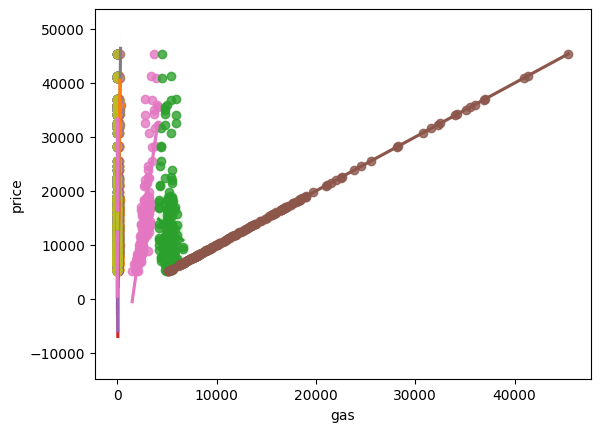

In [25]:
import seaborn as sns

# Tạo biểu đồ regplot cho từng biến số kiểu số
for numeric_variable in data.select_dtypes(include=['int64', 'float64']).columns:
    sns.regplot(x=numeric_variable, y='price', data=data)
from scipy.stats import pearsonr

# Tính hệ số tương quan và giá trị P-value cho từng biến số
for numeric_variable in data.select_dtypes(include=['int64', 'float64']).columns:
    corr, p_value = pearsonr(data[numeric_variable], data['price'])
    print(f"{numeric_variable} - Hệ số tương quan: {corr:.4f}, P-value: {p_value:.4f}")


Từ kết quả này, có thể kết luận rằng có một số biến số có ảnh hưởng đáng kể đến giá xe là width, curb-weight, engine-size, horsepower, city-mpg, highway-mpg, city-L/100km, length, wheel-base và bore.

***Câu 4: Trong tất cả các biến kiểu số của bộ dữ liệu có khả năng ảnh hưởng đến giá xe thì biến nào ảnh hưởng ít nhất, biến nào ảnh hưởng nhiều nhất.***

Biến ảnh hưởng ít nhất đến giá xe:
*  Biến có hệ số tương quan gần 0 như "stroke" (Hệ số tương quan: 0.0844) và "peak-rpm" (Hệ số tương quan: -0.0952) có ảnh hưởng ít đến giá xe.


Biến ảnh hưởng nhiều nhất đến giá xe:
*  Biến có hệ số tương quan cao với "price" như "engine-size" (Hệ số tương quan: 0.8719), "horsepower" (Hệ số tương quan: 0.8090), và "curb-weight" (Hệ số tương quan: 0.8343) ảnh hưởng nhiều nhất đến giá xe. Các biến này có mối quan hệ mạnh với giá xe và có hệ số tương quan dương lớn.

***Câu 5: Tìm kiểu dáng của xe có khả năng ít ảnh hưởng đến giá nhất.***

In [34]:
# Chuyển đổi cột 'body-style' sang kiểu dữ liệu số bằng mã hóa one-hot
data = pd.get_dummies(data, columns=['body-style'])

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình với 'price' là biến mục tiêu và các cột 'body-style' là biến độc lập
model.fit(data.filter(regex='body-style_'), data['price'])

# Lấy hệ số hồi quy tương ứng với từng kiểu dáng
coefficients = model.coef_

# Tìm kiểu dáng có hệ số hồi quy (coef) thấp nhất (ít ảnh hưởng đến giá nhất)
least_influential_style = data.filter(regex='body-style_').columns[np.argmin(coefficients)]

print("Kiểu dáng có khả năng ít ảnh hưởng đến giá nhất:", least_influential_style)


Kiểu dáng có khả năng ít ảnh hưởng đến giá nhất: body-style_hatchback


***Câu 6: Xe thuộc nhà sản xuất nào, kiểu dáng gì và sử dụng động cơ gì sẽ có giá tốt nhất.***

In [43]:
# Nhóm dữ liệu theo nhà sản xuất và kiểu dáng, sau đó tính giá trung bình cho mỗi nhóm
average_price_by_make_and_style = data.groupby(['make', 'body-style'])['price'].mean().reset_index()

# Tìm nhóm (nhà sản xuất và kiểu dáng) có giá trung bình thấp nhất
best_price_group = average_price_by_make_and_style[average_price_by_make_and_style['price'] == average_price_by_make_and_style['price'].min()]

# In ra kết quả
print("Xe có giá tốt nhất thuộc nhà sản xuất:", best_price_group['make'].values[0])
print("Kiểu dáng:", best_price_group['body-style'].values[0])

# Tìm loại động cơ có giá trung bình thấp nhất
average_price_by_engine = data.groupby('engine-type')['price'].mean().reset_index()
best_engine = average_price_by_engine[average_price_by_engine['price'] == average_price_by_engine['price'].min()]

# In ra loại động cơ có giá trung bình tốt nhất
print("Sử dụng động cơ:", best_engine['engine-type'].values[0])


Xe có giá tốt nhất thuộc nhà sản xuất: chevrolet
Kiểu dáng: hatchback
Sử dụng động cơ: ohc


***Câu 7: Tìm tập hợp gồm 3 giá trị biến phân loại bất kỳ có khả năng ảnh hưởng đến giá xe nhiều nhất.***

In [53]:
collumn = data.columns
print(collumn)

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')


In [63]:
from scipy.stats import f_oneway

# Select the categorical variables you want to test
categorical_variables = data.select_dtypes(include=['object']).columns

# Initialize a list to store ANOVA results (F-statistic and p-value)
anova_results = []

for variable in categorical_variables:
    # Create groups based on the values of the categorical variable
    groups = [data[data[variable] == category]['price'] for category in data[variable].unique()]

    # Perform ANOVA test
    f_statistic, p_value = f_oneway(*groups)

    # Store the results in the list
    anova_results.append((variable, f_statistic, p_value))

# Sort the results by F-statistic value in descending order
sorted_anova_results = sorted(anova_results, key=lambda x: x[1], reverse=True)

# Print the set of 3 categorical variables with the most influence on car price
top_categorical_variables = [result[0] for result in sorted_anova_results[:3]]
print("3 giá trị biến phân loại bất kỳ có khả năng ảnh hưởng đến giá xe nhiều nhất:", top_categorical_variables)


3 giá trị biến phân loại bất kỳ có khả năng ảnh hưởng đến giá xe nhiều nhất: ['horsepower-binned', 'drive-wheels', 'num-of-cylinders']


***Câu 8: Tìm tập hợp gồm 4 giá trị biến phân loại bất kỳ có khả năng ít ảnh hưởng đến giá xe nhiều nhất.***



In [62]:
from scipy.stats import f_oneway

# Select the categorical variables you want to test
categorical_variables = data.select_dtypes(include=['object']).columns

# Initialize a list to store ANOVA results (F-statistic and p-value)
anova_results = []

for variable in categorical_variables:
    # Create groups based on the values of the categorical variable
    groups = [data[data[variable] == category]['price'] for category in data[variable].unique()]

    # Perform ANOVA test
    f_statistic, p_value = f_oneway(*groups)

    # Store the results in the list
    anova_results.append((variable, f_statistic, p_value))

# Sort the results by F-statistic value in ascending order
sorted_anova_results = sorted(anova_results, key=lambda x: x[1])

# Print the set of 4 categorical variables with the least influence on car price
top_categorical_variables = [result[0] for result in sorted_anova_results[:4]]
print("4 giá trị biến phân loại bất kỳ có khả năng ít ảnh hưởng đến giá xe nhiều nhất:", top_categorical_variables)


4 giá trị biến phân loại bất kỳ có khả năng ít ảnh hưởng đến giá xe nhiều nhất: ['num-of-doors', 'aspiration', 'body-style', 'engine-type']


***Câu 9: Trong tất cả các biến kiểu phân loại của bộ dữ liệu thì biến nào có khả năng ảnh hưởng đến giá xe.***

In [61]:
from scipy.stats import f_oneway

# Select all categorical variables in the dataset
categorical_variables = data.select_dtypes(include=['object']).columns

# Initialize a list to store ANOVA results (F-statistic and p-value)
anova_results = []

for variable in categorical_variables:
    # Create groups based on the values of the categorical variable
    groups = [data[data[variable] == category]['price'] for category in data[variable].unique()]

    # Perform ANOVA test
    f_statistic, p_value = f_oneway(*groups)

    # Store the results in the list
    anova_results.append((variable, f_statistic, p_value))

# Sort the results by F-statistic value in descending order
sorted_anova_results = sorted(anova_results, key=lambda x: x[1], reverse=True)

# Print the categorical variable that significantly influences car price
influential_variable = [result[0] for result in sorted_anova_results if result[2] < 0.05]
print("The categorical variable that significantly influences car price:", influential_variable)


The categorical variable that significantly influences car price: ['horsepower-binned', 'drive-wheels', 'num-of-cylinders', 'make', 'engine-location', 'fuel-system', 'engine-type', 'body-style', 'aspiration']


***Câu 10: Đánh giá giá trị ngoại lệ của biến mục tiêu? Nếu được phép tăng cường thêm dữ liệu thì nên chọn mẫu như thế nào?***

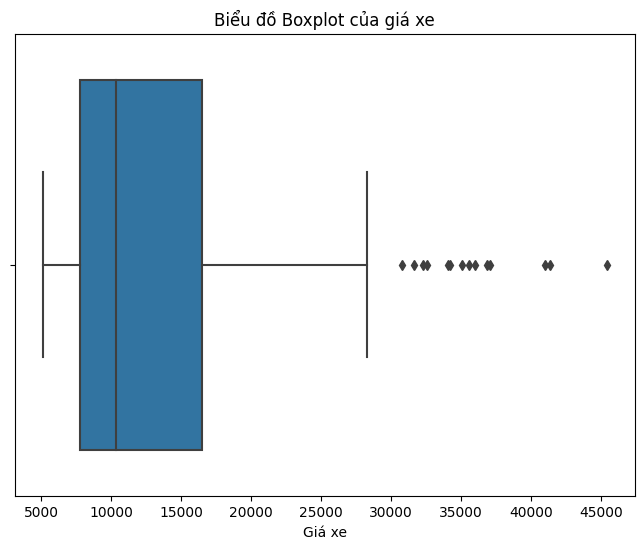

Các giá trị ngoại lệ:
     symboling  normalized-losses           make aspiration num-of-doors  \
3            0                145         jaguar        std         four   
4           -1                 93  mercedes-benz      turbo         four   
6            0                122  mercedes-benz        std         four   
14           0                122            bmw        std         four   
24           3                122        porsche        std          two   
66           3                142  mercedes-benz        std          two   
71           0                122            bmw        std          two   
82           0                122            bmw        std         four   
105          1                122  mercedes-benz        std          two   
106          0                122         jaguar        std         four   
127          0                122         jaguar        std          two   
132          3                122        porsche        std       

In [64]:
# Vẽ biểu đồ Boxplot cho biến mục tiêu (giá xe)
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['price'])
plt.xlabel('Giá xe')
plt.title('Biểu đồ Boxplot của giá xe')
plt.show()

# Xác định giá trị ngoại lệ bằng mã nguồn
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]
print("Các giá trị ngoại lệ:")
print(outliers)
